# Análisis Exploratorio de Datos (EDA) - Modelo Hedónico MICRO

**Dataset:** 393 observaciones (Idealista ↔ Catastro matched - Algoritmo Mejorado)

**Objetivo:** Explorar las características del dataset antes de entrenar el modelo hedónico MICRO

**Fecha:** 20 de diciembre de 2025

**Nota:** Este notebook usa el dataset mejorado con algoritmo de matching optimizado (77.8% match rate)


## 1. Configuración e Imports


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import json
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Rutas (desde notebooks/ hacia data/processed/fase2/)
DATA_DIR = Path('../data/processed/fase2')
OUTPUT_DIR = Path('../data/processed/fase2')
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print("✅ Imports y configuración completados")


✅ Imports y configuración completados


## 2. Carga de Datos


In [4]:
# Cargar dataset mejorado
df = pd.read_csv(DATA_DIR / 'dataset_micro_hedonic_improved.csv')

print(f"📊 Dataset mejorado cargado: {len(df)} observaciones")
print(f"📊 Variables: {len(df.columns)}")
print(f"\nColumnas:")
for col in df.columns:
    print(f"  - {col}")

print(f"\n📋 Primeras filas:")
df.head()


📊 Dataset mejorado cargado: 393 observaciones
📊 Variables: 11

Columnas:
  - precio
  - superficie_m2
  - habitaciones
  - ano_construccion
  - plantas
  - barrio_id
  - barrio_nombre
  - lat
  - lon
  - match_score
  - precio_m2

📋 Primeras filas:


,precio,superficie_m2,habitaciones,ano_construccion,plantas,barrio_id,barrio_nombre,lat,lon,match_score,precio_m2
0,490000,80.0,2.0,1930.0,1.0,31.0,la Vila de Gràcia,41.404895,2.155870,0.700000,6125.000000
1,930000,145.0,3.0,2009.0,0.0,31.0,la Vila de Gràcia,41.404658,2.153753,0.686111,6413.793103
2,628000,101.0,3.0,1965.0,1.0,28.0,Vallcarca i els Penitents,41.413237,2.143220,0.800000,6217.821782
3,890000,144.0,3.0,2009.0,0.0,31.0,la Vila de Gràcia,41.404658,2.153753,0.700000,6180.555556
4,550000,76.0,2.0,1902.0,NaN,31.0,la Vila de Gràcia,41.399537,2.159470,0.700000,7236.842105


## 3. Estadísticas Descriptivas


In [5]:
print("=" * 70)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 70)

# Estadísticas básicas
print("\n📊 Variables numéricas:")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(df[numeric_cols].describe().round(2))

print("\n📋 Valores faltantes:")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(1)
missing_df = pd.DataFrame({
    'Faltantes': missing,
    'Porcentaje': missing_pct
})
print(missing_df[missing_df['Faltantes'] > 0])


ESTADÍSTICAS DESCRIPTIVAS

📊 Variables numéricas:
           precio  superficie_m2  habitaciones  ano_construccion  plantas  \
count      393.00         393.00        390.00            393.00   332.00   
mean    649143.69         102.30          2.91           1936.20     0.64   
std     539439.91          60.14          1.68             50.69     1.02   
min     140900.00          23.00          0.00           1850.00    -1.00   
25%     415000.00          74.00          2.00           1902.00     0.00   
50%     510000.00          91.00          3.00           1930.00     0.00   
75%     650000.00         117.00          4.00           1979.00     1.00   
max    4500000.00         945.00         27.00           2009.00     4.00   

       barrio_id     lat     lon  match_score  precio_m2  
count     393.00  393.00  393.00       393.00     393.00  
mean       30.51   41.40    2.15         0.65    6356.56  
std         0.96    0.01    0.00         0.07    3066.53  
min        28.00   4

## 4. Análisis de Variables Principales


In [6]:
# Análisis de precio
print("=" * 70)
print("ANÁLISIS DE PRECIO")
print("=" * 70)
print(f"\nPrecio promedio: {df['precio'].mean():,.0f} €")
print(f"Precio mediano: {df['precio'].median():,.0f} €")
print(f"Precio mínimo: {df['precio'].min():,.0f} €")
print(f"Precio máximo: {df['precio'].max():,.0f} €")
print(f"Desviación estándar: {df['precio'].std():,.0f} €")

# Análisis de precio/m²
print("\n" + "=" * 70)
print("ANÁLISIS DE PRECIO/M²")
print("=" * 70)
print(f"\nPrecio/m² promedio: {df['precio_m2'].mean():,.0f} €/m²")
print(f"Precio/m² mediano: {df['precio_m2'].median():,.0f} €/m²")
print(f"Precio/m² mínimo: {df['precio_m2'].min():,.0f} €/m²")
print(f"Precio/m² máximo: {df['precio_m2'].max():,.0f} €/m²")

# Análisis de superficie
print("\n" + "=" * 70)
print("ANÁLISIS DE SUPERFICIE")
print("=" * 70)
print(f"\nSuperficie promedio: {df['superficie_m2'].mean():.1f} m²")
print(f"Superficie mediana: {df['superficie_m2'].median():.1f} m²")
print(f"Superficie mínima: {df['superficie_m2'].min():.1f} m²")
print(f"Superficie máxima: {df['superficie_m2'].max():.1f} m²")


ANÁLISIS DE PRECIO

Precio promedio: 649,144 €
Precio mediano: 510,000 €
Precio mínimo: 140,900 €
Precio máximo: 4,500,000 €
Desviación estándar: 539,440 €

ANÁLISIS DE PRECIO/M²

Precio/m² promedio: 6,357 €/m²
Precio/m² mediano: 5,515 €/m²
Precio/m² mínimo: 1,174 €/m²
Precio/m² máximo: 27,108 €/m²

ANÁLISIS DE SUPERFICIE

Superficie promedio: 102.3 m²
Superficie mediana: 91.0 m²
Superficie mínima: 23.0 m²
Superficie máxima: 945.0 m²


## 5. Visualizaciones - Distribuciones


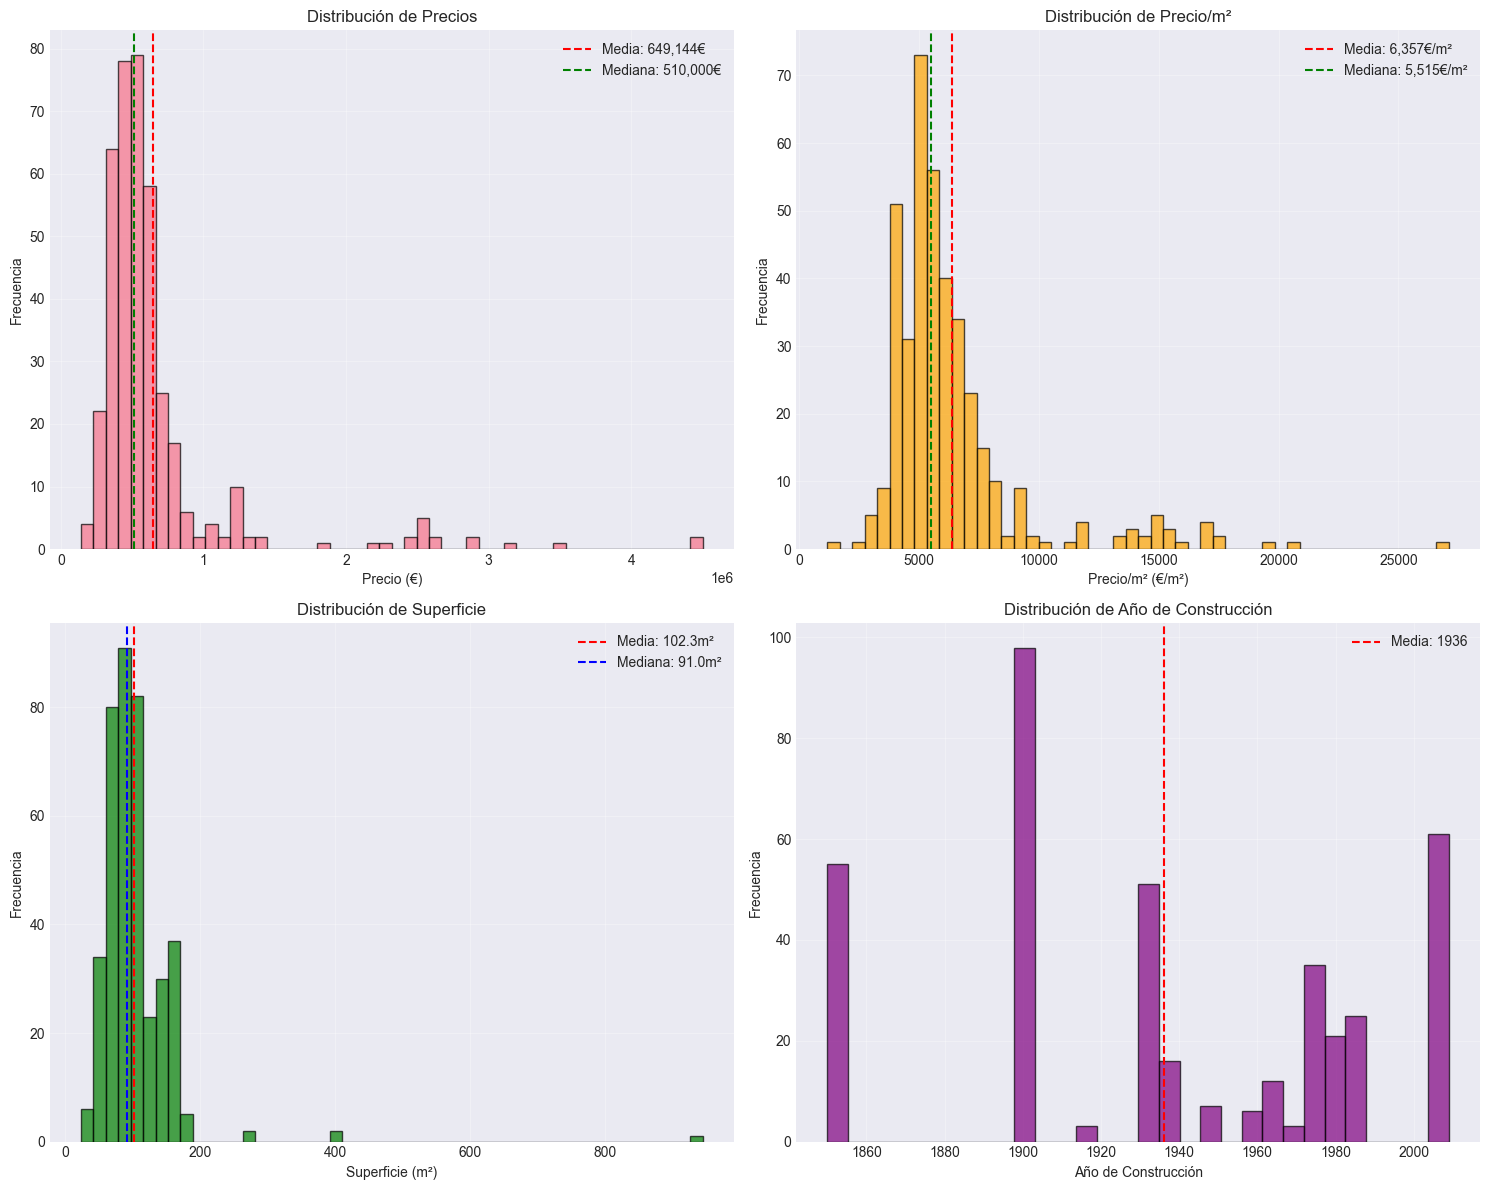

✅ Gráficos de distribuciones guardados


In [7]:
# Distribución de precios
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Precio
axes[0, 0].hist(df['precio'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['precio'].mean(), color='red', linestyle='--', label=f'Media: {df["precio"].mean():,.0f}€')
axes[0, 0].axvline(df['precio'].median(), color='green', linestyle='--', label=f'Mediana: {df["precio"].median():,.0f}€')
axes[0, 0].set_xlabel('Precio (€)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de Precios')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Precio/m²
axes[0, 1].hist(df['precio_m2'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].axvline(df['precio_m2'].mean(), color='red', linestyle='--', label=f'Media: {df["precio_m2"].mean():,.0f}€/m²')
axes[0, 1].axvline(df['precio_m2'].median(), color='green', linestyle='--', label=f'Mediana: {df["precio_m2"].median():,.0f}€/m²')
axes[0, 1].set_xlabel('Precio/m² (€/m²)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de Precio/m²')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Superficie
axes[1, 0].hist(df['superficie_m2'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].axvline(df['superficie_m2'].mean(), color='red', linestyle='--', label=f'Media: {df["superficie_m2"].mean():.1f}m²')
axes[1, 0].axvline(df['superficie_m2'].median(), color='blue', linestyle='--', label=f'Mediana: {df["superficie_m2"].median():.1f}m²')
axes[1, 0].set_xlabel('Superficie (m²)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribución de Superficie')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Año de construcción
axes[1, 1].hist(df['ano_construccion'], bins=30, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].axvline(df['ano_construccion'].mean(), color='red', linestyle='--', label=f'Media: {df["ano_construccion"].mean():.0f}')
axes[1, 1].set_xlabel('Año de Construcción')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribución de Año de Construcción')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'eda_distribuciones.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráficos de distribuciones guardados")


## 6. Análisis por Barrio


ESTADÍSTICAS POR BARRIO
                                   precio                                  \
                                    count       mean    median        std   
barrio_nombre                                                               
Vallcarca i els Penitents              32  614070.94  556500.0  327872.13   
el Camp d'en Grassot i Gràcia Nova      4  631250.00  467500.0  561521.37   
el Coll                                30  571142.73  650000.0  177418.17   
la Salut                               42  481928.57  425000.0  118479.47   
la Vila de Gràcia                     285  686185.68  511000.0  612415.08   

                                   precio_m2          superficie_m2         \
                                        mean   median          mean median   
barrio_nombre                                                                
Vallcarca i els Penitents            5486.25  5082.31        114.78   91.0   
el Camp d'en Grassot i Gràcia Nova   5600.95  5

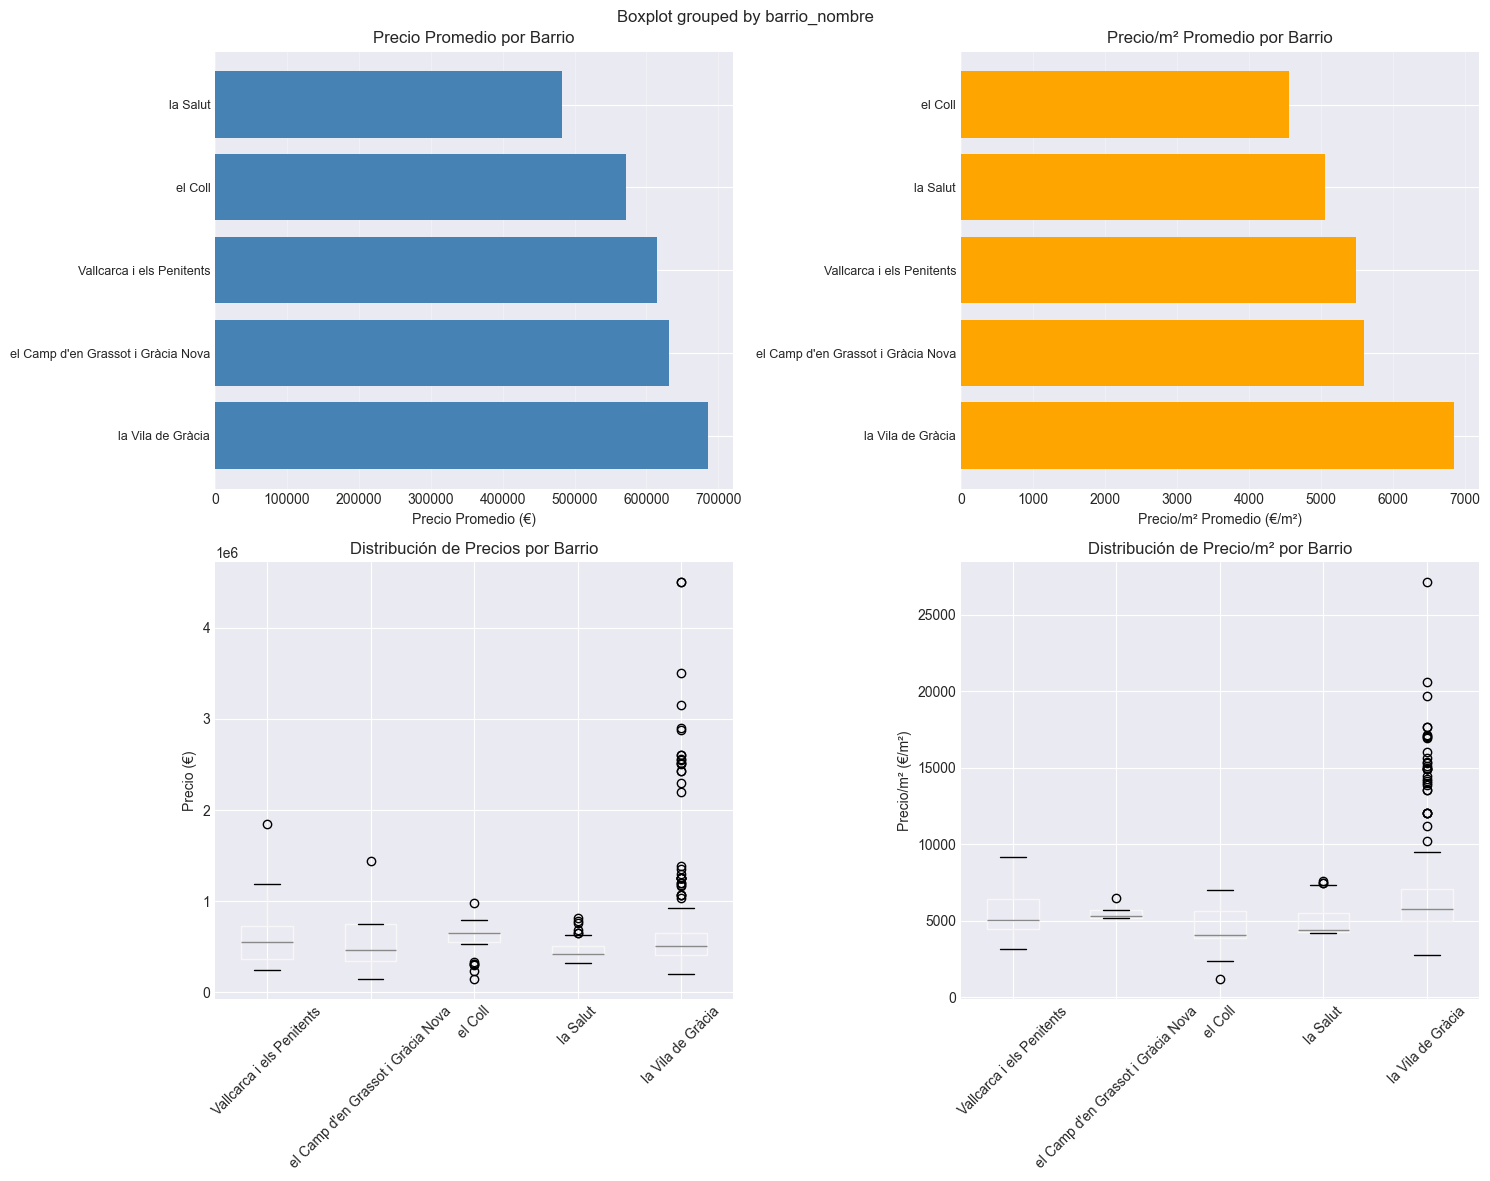

✅ Análisis por barrio completado


In [8]:
# Estadísticas por barrio
barrio_stats = df.groupby('barrio_nombre').agg({
    'precio': ['count', 'mean', 'median', 'std'],
    'precio_m2': ['mean', 'median'],
    'superficie_m2': ['mean', 'median'],
    'ano_construccion': 'mean'
}).round(2)

print("=" * 70)
print("ESTADÍSTICAS POR BARRIO")
print("=" * 70)
print(barrio_stats)

# Visualización por barrio
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Precio promedio por barrio
barrio_precio = df.groupby('barrio_nombre')['precio'].mean().sort_values(ascending=False)
axes[0, 0].barh(range(len(barrio_precio)), barrio_precio.values, color='steelblue')
axes[0, 0].set_yticks(range(len(barrio_precio)))
axes[0, 0].set_yticklabels(barrio_precio.index, fontsize=9)
axes[0, 0].set_xlabel('Precio Promedio (€)')
axes[0, 0].set_title('Precio Promedio por Barrio')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Precio/m² promedio por barrio
barrio_precio_m2 = df.groupby('barrio_nombre')['precio_m2'].mean().sort_values(ascending=False)
axes[0, 1].barh(range(len(barrio_precio_m2)), barrio_precio_m2.values, color='orange')
axes[0, 1].set_yticks(range(len(barrio_precio_m2)))
axes[0, 1].set_yticklabels(barrio_precio_m2.index, fontsize=9)
axes[0, 1].set_xlabel('Precio/m² Promedio (€/m²)')
axes[0, 1].set_title('Precio/m² Promedio por Barrio')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Boxplot precio por barrio
df.boxplot(column='precio', by='barrio_nombre', ax=axes[1, 0], rot=45)
axes[1, 0].set_title('Distribución de Precios por Barrio')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Precio (€)')

# Boxplot precio/m² por barrio
df.boxplot(column='precio_m2', by='barrio_nombre', ax=axes[1, 1], rot=45)
axes[1, 1].set_title('Distribución de Precio/m² por Barrio')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Precio/m² (€/m²)')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'eda_por_barrio.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Análisis por barrio completado")


## 7. Análisis de Correlaciones


MATRIZ DE CORRELACIONES
                  precio  precio_m2  superficie_m2  habitaciones  \
precio             1.000      0.729          0.625         0.294   
precio_m2          0.729      1.000         -0.006        -0.199   
superficie_m2      0.625     -0.006          1.000         0.738   
habitaciones       0.294     -0.199          0.738         1.000   
ano_construccion   0.105     -0.079          0.180         0.134   
plantas           -0.173     -0.038         -0.209        -0.153   
match_score       -0.130     -0.136         -0.034        -0.022   

                  ano_construccion  plantas  match_score  
precio                       0.105   -0.173       -0.130  
precio_m2                   -0.079   -0.038       -0.136  
superficie_m2                0.180   -0.209       -0.034  
habitaciones                 0.134   -0.153       -0.022  
ano_construccion             1.000   -0.342        0.071  
plantas                     -0.342    1.000        0.184  
match_score       

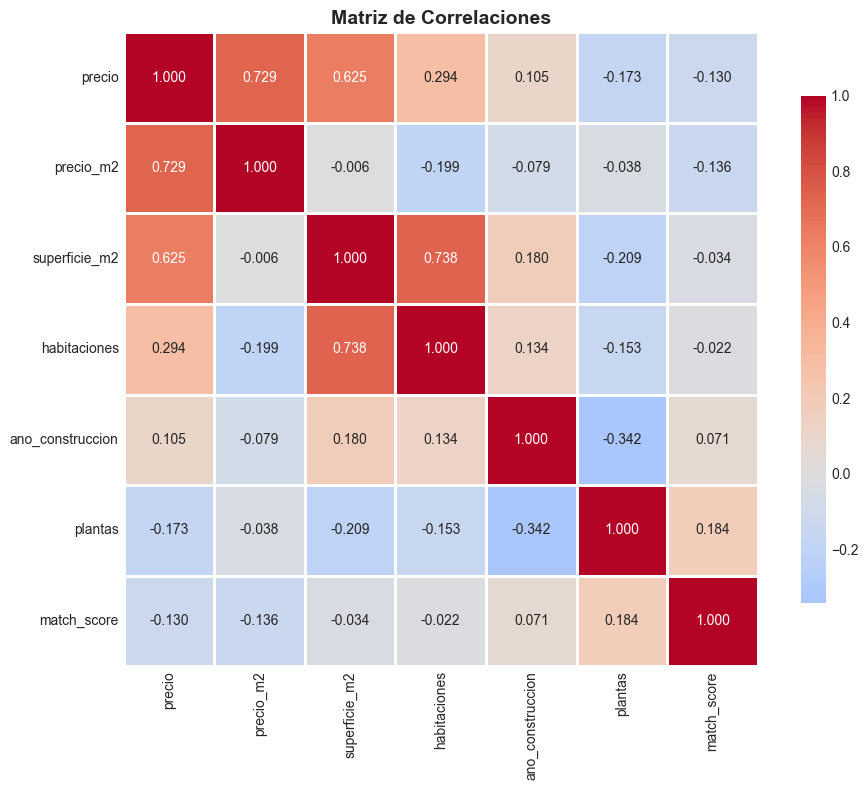


CORRELACIONES CON PRECIO/M² (Variable Objetivo)
precio              :   0.729
superficie_m2       :  -0.006
plantas             :  -0.038
ano_construccion    :  -0.079
match_score         :  -0.136
habitaciones        :  -0.199


In [9]:
# Matriz de correlación
corr_vars = ['precio', 'precio_m2', 'superficie_m2', 'habitaciones', 'ano_construccion', 'plantas', 'match_score']
# Filtrar columnas que existen
corr_vars = [v for v in corr_vars if v in df.columns]
corr_matrix = df[corr_vars].corr()

print("=" * 70)
print("MATRIZ DE CORRELACIONES")
print("=" * 70)
print(corr_matrix.round(3))

# Visualización de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlaciones', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'eda_correlaciones.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlaciones con precio_m2 (variable objetivo)
print("\n" + "=" * 70)
print("CORRELACIONES CON PRECIO/M² (Variable Objetivo)")
print("=" * 70)
if 'precio_m2' in corr_matrix.columns:
    corr_precio_m2 = corr_matrix['precio_m2'].sort_values(ascending=False)
    for var, corr in corr_precio_m2.items():
        if var != 'precio_m2':
            print(f"{var:20s}: {corr:7.3f}")


## 8. Análisis de Relaciones (Scatter Plots)


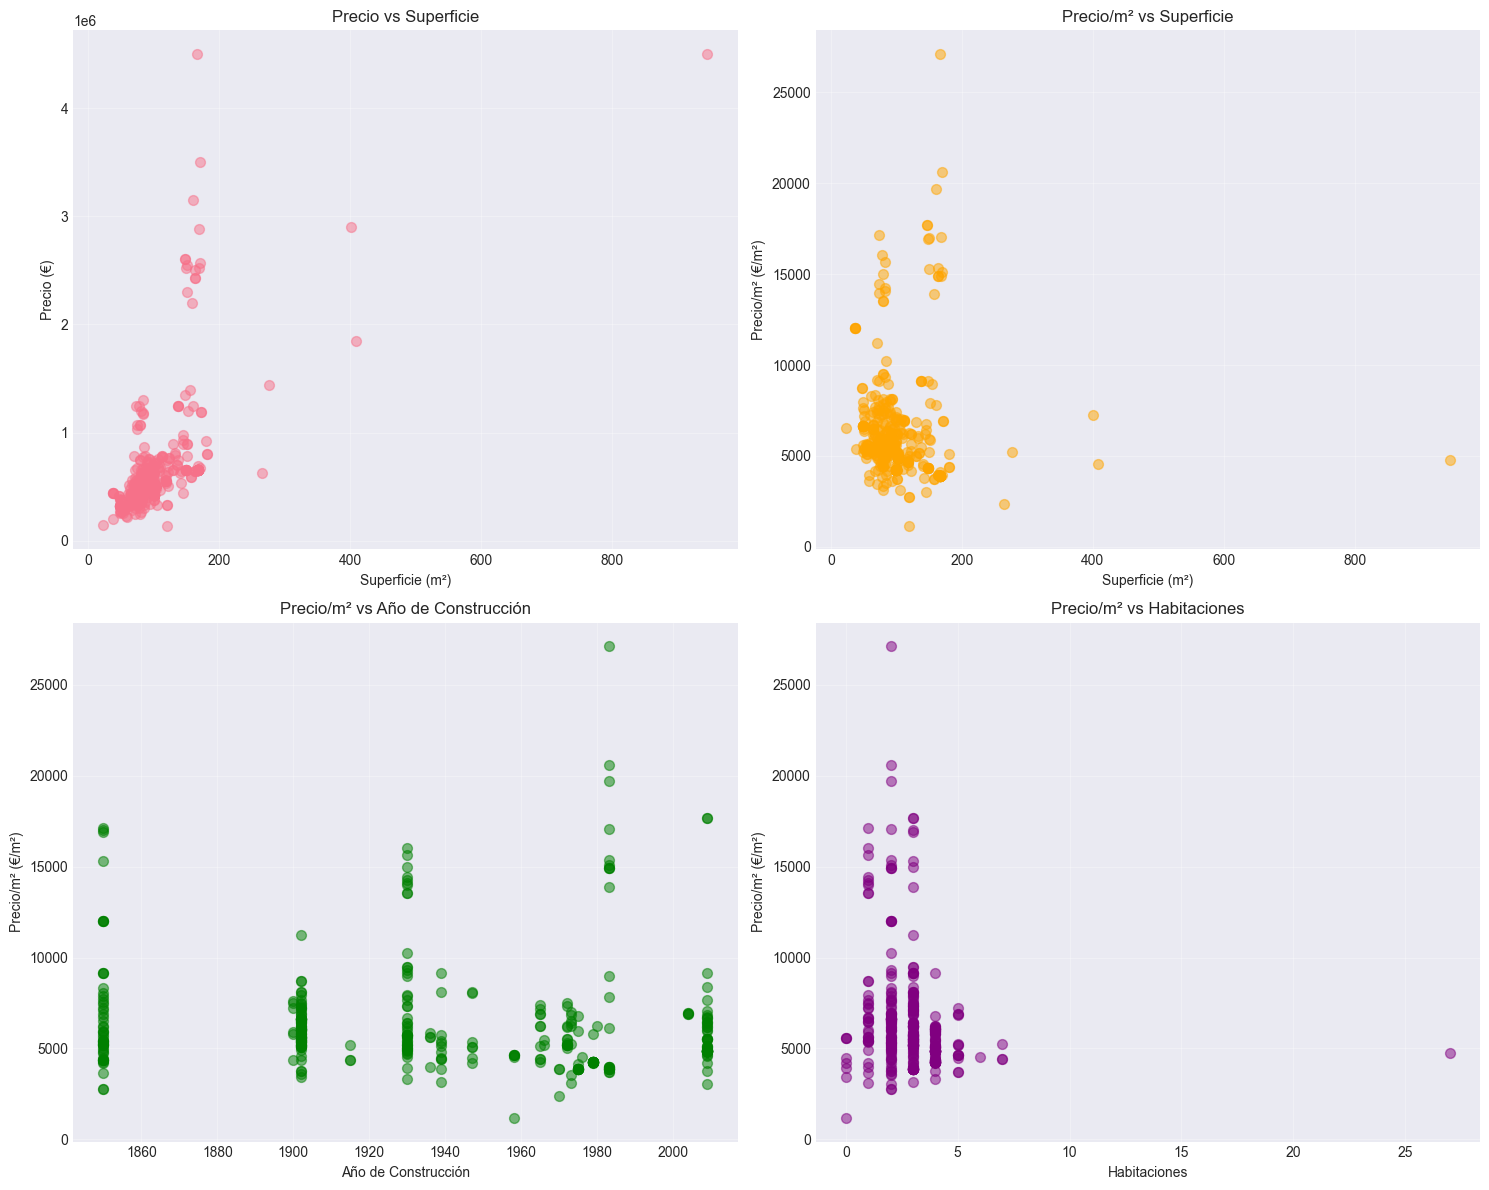

✅ Scatter plots guardados


In [10]:
# Scatter plots de relaciones clave
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Precio vs Superficie
axes[0, 0].scatter(df['superficie_m2'], df['precio'], alpha=0.5, s=50)
axes[0, 0].set_xlabel('Superficie (m²)')
axes[0, 0].set_ylabel('Precio (€)')
axes[0, 0].set_title('Precio vs Superficie')
axes[0, 0].grid(True, alpha=0.3)

# Precio/m² vs Superficie
axes[0, 1].scatter(df['superficie_m2'], df['precio_m2'], alpha=0.5, s=50, color='orange')
axes[0, 1].set_xlabel('Superficie (m²)')
axes[0, 1].set_ylabel('Precio/m² (€/m²)')
axes[0, 1].set_title('Precio/m² vs Superficie')
axes[0, 1].grid(True, alpha=0.3)

# Precio/m² vs Año de Construcción
axes[1, 0].scatter(df['ano_construccion'], df['precio_m2'], alpha=0.5, s=50, color='green')
axes[1, 0].set_xlabel('Año de Construcción')
axes[1, 0].set_ylabel('Precio/m² (€/m²)')
axes[1, 0].set_title('Precio/m² vs Año de Construcción')
axes[1, 0].grid(True, alpha=0.3)

# Precio/m² vs Habitaciones
axes[1, 1].scatter(df['habitaciones'], df['precio_m2'], alpha=0.5, s=50, color='purple')
axes[1, 1].set_xlabel('Habitaciones')
axes[1, 1].set_ylabel('Precio/m² (€/m²)')
axes[1, 1].set_title('Precio/m² vs Habitaciones')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'eda_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Scatter plots guardados")


## 9. Detección de Outliers


DETECCIÓN DE OUTLIERS (Método IQR)

precio:
  Outliers: 38 (9.7%)
  Rango normal: [62500.00, 1002500.00]

precio_m2:
  Outliers: 32 (8.1%)
  Rango normal: [2029.97, 9494.22]

superficie_m2:
  Outliers: 5 (1.3%)
  Rango normal: [9.50, 181.50]


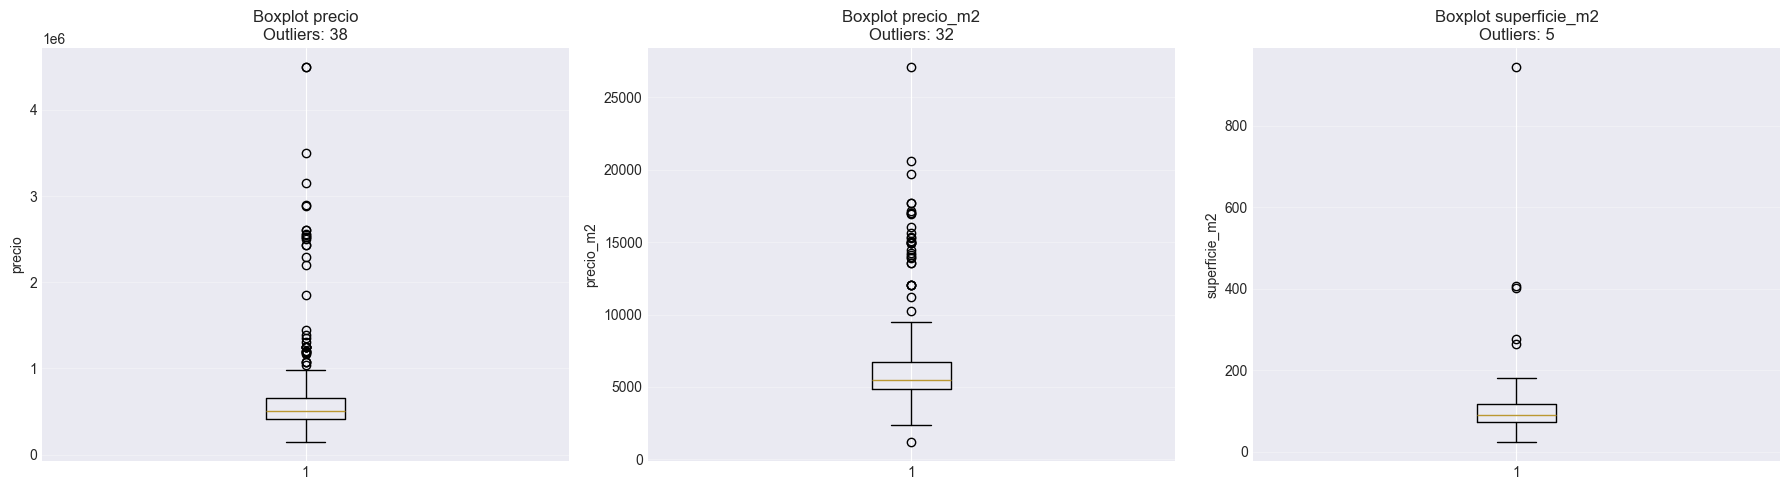


✅ Análisis de outliers completado


In [11]:
# Detección de outliers usando IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("=" * 70)
print("DETECCIÓN DE OUTLIERS (Método IQR)")
print("=" * 70)

outlier_vars = ['precio', 'precio_m2', 'superficie_m2']
outlier_summary = []

for var in outlier_vars:
    outliers, lower, upper = detect_outliers_iqr(df, var)
    outlier_summary.append({
        'Variable': var,
        'Outliers': len(outliers),
        'Porcentaje': len(outliers) / len(df) * 100,
        'Límite Inferior': lower,
        'Límite Superior': upper
    })
    print(f"\n{var}:")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    print(f"  Rango normal: [{lower:.2f}, {upper:.2f}]")

outlier_df = pd.DataFrame(outlier_summary)

# Visualización de outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(outlier_vars):
    outliers, lower, upper = detect_outliers_iqr(df, var)
    axes[i].boxplot(df[var], vert=True)
    axes[i].set_ylabel(var)
    axes[i].set_title(f'Boxplot {var}\nOutliers: {len(outliers)}')
    axes[i].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'eda_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Análisis de outliers completado")


## 10. Resumen y Preparación para Modelo


In [12]:
# Resumen del EDA
summary = {
    'total_observaciones': len(df),
    'variables': len(df.columns),
    'precio_promedio': float(df['precio'].mean()),
    'precio_m2_promedio': float(df['precio_m2'].mean()),
    'superficie_promedio': float(df['superficie_m2'].mean()),
    'ano_construccion_promedio': float(df['ano_construccion'].mean()),
    'barrios': int(df['barrio_nombre'].nunique()),
    'completitud_campos_criticos': 100.0,
    'outliers_precio': int(outlier_df[outlier_df['Variable'] == 'precio']['Outliers'].values[0]),
    'outliers_precio_m2': int(outlier_df[outlier_df['Variable'] == 'precio_m2']['Outliers'].values[0]),
}

# Agregar correlaciones si existen
if 'precio_m2' in corr_matrix.columns:
    summary['correlacion_superficie_precio_m2'] = float(corr_matrix.loc['superficie_m2', 'precio_m2'])
    summary['correlacion_ano_precio_m2'] = float(corr_matrix.loc['ano_construccion', 'precio_m2'])
    if 'habitaciones' in corr_matrix.columns:
        summary['correlacion_habitaciones_precio_m2'] = float(corr_matrix.loc['habitaciones', 'precio_m2'])

with open(OUTPUT_DIR / 'eda_summary.json', 'w', encoding='utf-8') as f:
    json.dump(summary, f, indent=2, ensure_ascii=False)

print("=" * 70)
print("RESUMEN DEL EDA")
print("=" * 70)
for key, value in summary.items():
    if isinstance(value, float):
        print(f"{key:30s}: {value:,.2f}")
    else:
        print(f"{key:30s}: {value}")

print(f"\n✅ Resumen guardado en: {OUTPUT_DIR / 'eda_summary.json'}")
print(f"✅ Dataset listo para modelo hedónico MICRO")


RESUMEN DEL EDA
total_observaciones           : 393
variables                     : 11
precio_promedio               : 649,143.69
precio_m2_promedio            : 6,356.56
superficie_promedio           : 102.30
ano_construccion_promedio     : 1,936.20
barrios                       : 5
completitud_campos_criticos   : 100.00
outliers_precio               : 38
outliers_precio_m2            : 32
correlacion_superficie_precio_m2: -0.01
correlacion_ano_precio_m2     : -0.08
correlacion_habitaciones_precio_m2: -0.20

✅ Resumen guardado en: ../data/processed/fase2/eda_summary.json
✅ Dataset listo para modelo hedónico MICRO
